In [9]:
import json
import pandas as pd
from pathlib import Path

# --- Cấu hình ---
input_path = Path("/Users/user/Downloads/news_dataset.json")  # hoặc tên file .jsonl bạn tải về
output_csv = "vietnamese_online_news.csv"

# --- Đọc dữ liệu JSON / JSONL ---
data = []
with open(input_path, "r", encoding="utf-8") as f:
    first_char = f.read(1)
    f.seek(0)
    if first_char == "[":
        data = json.load(f)  # JSON dạng array
    else:
        # JSON Lines (từng dòng là một bản ghi)
        for line in f:
            line = line.strip()
            if line:
                data.append(json.loads(line))

# --- Chuyển sang DataFrame ---
df = pd.DataFrame(data)

# Hiển thị các cột để bạn kiểm tra trường có sẵn
print("Các cột dữ liệu:", df.columns.tolist())

# Lọc các trường cần thiết (khai báo theo dataset thực tế)
use_cols = ["title", "content", "category", "date", "source", "topic"]
existing = [c for c in use_cols if c in df.columns]
df = df[existing].copy()

# --- Lưu ra CSV ---
df.to_csv(output_csv, index=False, encoding="utf-8-sig")
print(f"Đã lưu {len(df)} dòng dữ liệu vào '{output_csv}'")
df.head()


Các cột dữ liệu: ['id', 'author', 'content', 'picture_count', 'processed', 'source', 'title', 'topic', 'url', 'crawled_at']
Đã lưu 184539 dòng dữ liệu vào 'vietnamese_online_news.csv'


,title,content,source,topic
0,"Tên cướp tiệm vàng tại Huế là đại uý công an, ...","Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã c...",docbao.vn,Pháp luật
1,"Bỏ qua mạng 5G, Nga tiến thẳng từ 4G lên 6G","Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...",vtc.vn,Sống kết nối
2,Địa phương nào đứng đầu cả nước tổng điểm 3 mô...,Kết quả thi tốt nghiệp THPT năm 2022 cho thấy ...,thanhnien.vn,Giáo dục
3,Người chết trong mưa lũ 'nghìn năm có một' ở M...,Thống đốc Kentucky Andy Beshear hôm 31/7 cho h...,vnexpress,Thế giới
4,"Hải Phòng: Hình ảnh xe ""điên"" gây tai nạn liên...",Vụ tai nạn giao thông liên hoàn trên phố đi bộ...,soha,Thời sự - Xã hội


In [14]:
import pandas as pd

df = pd.read_csv("/Users/user/Downloads/vietnamese_online_news.csv")
df.head(10)  # Jupyter sẽ hiển thị bảng gọn gàng hơn print()


,title,content,source,topic
0,"Tên cướp tiệm vàng tại Huế là đại uý công an, ...","Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã c...",docbao.vn,Pháp luật
1,"Bỏ qua mạng 5G, Nga tiến thẳng từ 4G lên 6G","Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...",vtc.vn,Sống kết nối
2,Địa phương nào đứng đầu cả nước tổng điểm 3 mô...,Kết quả thi tốt nghiệp THPT năm 2022 cho thấy ...,thanhnien.vn,Giáo dục
3,Người chết trong mưa lũ 'nghìn năm có một' ở M...,Thống đốc Kentucky Andy Beshear hôm 31/7 cho h...,vnexpress,Thế giới
4,"Hải Phòng: Hình ảnh xe ""điên"" gây tai nạn liên...",Vụ tai nạn giao thông liên hoàn trên phố đi bộ...,soha,Thời sự - Xã hội
5,Đức có thể suy thoái kinh tế năm nay,"Chia sẻ trên Twitter, thị trưởng Hanover Belit...",tuoitre.vn,Thế giới
6,Những khoảnh khắc đẹp của Gia Hân khi đăng qua...,"""Em vỡ òa trong hạnh phúc khi được xướng tên ở...",baoquocte,Giải trí
7,Lịch thi đấu vòng 11 V-League 2022: HAGL dễ th...,NaN,vov.vn,THỂ THAO
8,Soi kèo nhà cái Liverpool vs Strasbourg. Nhận ...,Soi kèo nhà cái Liverpool vs Strasbourg. Nhận ...,thethaovanhoa,NaN
9,"Bị thay sau hiệp 1, Ronaldo đùng đùng bỏ về sớm",Siêu sao Bồ Đào Nha được HLV Erik ten Hag bố t...,bongdaplus,Ngoại hạng Anh


In [20]:
import pandas as pd

df = pd.read_csv("/Users/user/Downloads/vietnamese_online_news.csv")
print(df['topic'].value_counts())  # đổi 'label' thành tên cột nhãn của bạn


topic
Thế giới                                                                                           10722
Thể thao                                                                                           10171
Xã hội                                                                                              7708
Pháp luật                                                                                           7442
Thời sự                                                                                             7204
                                                                                                   ...  
Dưới đây là những thủ thuật mà ông chia sẻ để có thể tiết kiệm càng nhiều càng tốt.                    1
Chủ tịch Hội đồng Châu Âu tuyên bố gói viện trợ quân sự 500 triệu euro cho Ukraine. Ảnh Twitter        1
Bên trong một lò "độ xe" với những chiếc mô tô được "độ chế" kỳ quái.                                  1
Xe khách biến dạng hoàn toàn.                    

In [1]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv("/Users/user/Downloads/vietnamese_online_news.csv")

# Xem số lượng mẫu của từng lớp
print(df['topic'].value_counts())


topic
Thế giới                                                                                           10722
Thể thao                                                                                           10171
Xã hội                                                                                              7708
Pháp luật                                                                                           7442
Thời sự                                                                                             7204
                                                                                                   ...  
Dưới đây là những thủ thuật mà ông chia sẻ để có thể tiết kiệm càng nhiều càng tốt.                    1
Chủ tịch Hội đồng Châu Âu tuyên bố gói viện trợ quân sự 500 triệu euro cho Ukraine. Ảnh Twitter        1
Bên trong một lò "độ xe" với những chiếc mô tô được "độ chế" kỳ quái.                                  1
Xe khách biến dạng hoàn toàn.                    

topic
Thế giới              12347
Thể thao              10171
Xã hội                 9263
Pháp luật              7442
Thời sự                7204
Kinh doanh             5793
Giải trí               5765
Đời sống               5511
Sức khỏe               4929
Giáo dục               3504
Kinh tế                3441
Trong nước             1788
Video                  1776
Văn hóa                1605
Xe                     1556
Công nghệ              1535
Giới trẻ               1339
Văn hóa - Giải trí     1283
Tin tức                1279
Du lịch                1212
Name: count, dtype: int64
🎯 Accuracy: 0.7452

📊 Classification Report:
                    precision    recall  f1-score   support

         Công nghệ       0.76      0.65      0.70       307
           Du lịch       0.57      0.57      0.57       242
          Giáo dục       0.80      0.89      0.84       701
          Giải trí       0.77      0.89      0.83      1153
          Giới trẻ       0.80      0.68      0.73       268
  

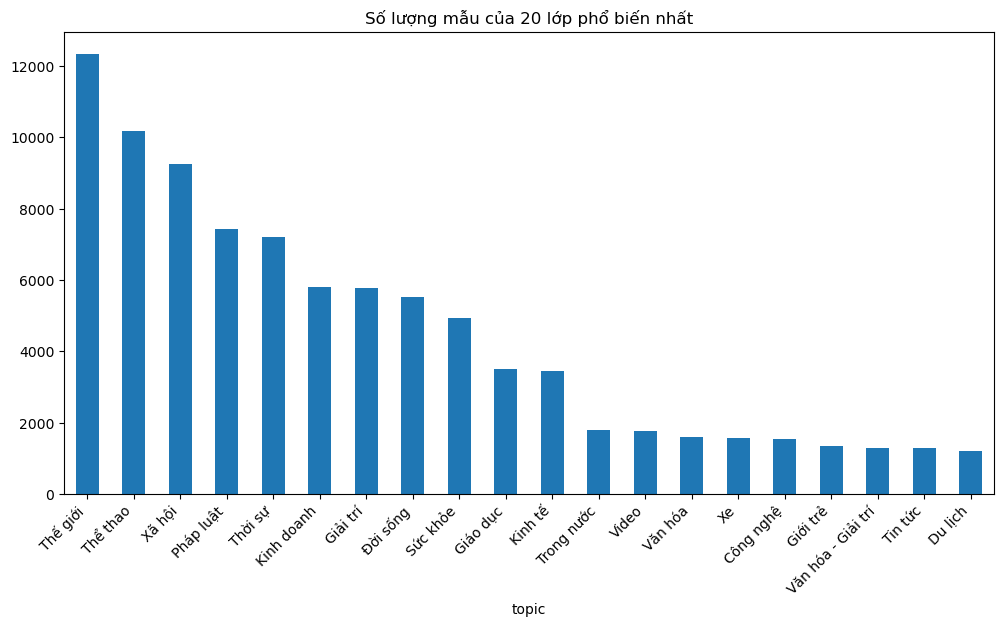

In [8]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu
df = pd.read_csv("/Users/user/Downloads/vietnamese_online_news.csv")  # thay bằng file của bạn
# Chuẩn hóa nhãn
df['topic'] = df['topic'].replace({
    'THẾ GIỚI': 'Thế giới',
    'XÃ HỘI': 'Xã hội',
    'Sống': 'Đời sống'
})
# Xem lại các nhãn còn lại
print(df['topic'].value_counts().head(20))
# 2. Gộp title và content thành 1 cột text
df['text'] = df['title'].fillna('') + ' ' + df['content'].fillna('')
# 2. Lấy 20 lớp phổ biến nhất
top_classes = df['topic'].value_counts().nlargest(20).index
df = df[df['topic'].isin(top_classes)]

# 3. Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['topic'], test_size=0.2, random_state=42, stratify=df['topic']
)

# 4. Tạo vector TF-IDF (tinh chỉnh tham số)
tfidf = TfidfVectorizer(
    max_features=20000,   # tăng số lượng đặc trưng
    ngram_range=(1, 3),  # dùng cả unigram và bigram
    min_df=3,            # loại bỏ từ xuất hiện quá ít
    max_df=0.8           # bỏ từ xuất hiện quá nhiều
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 5. Huấn luyện Logistic Regression (tinh chỉnh tham số)
model = LogisticRegression(
    max_iter=400,       # tăng số vòng lặp để hội tụ
    C=4.0,              # tăng độ phức tạp (giảm regularization)
    solver='lbfgs',
    multi_class='multinomial'
)
model.fit(X_train_tfidf, y_train)

# 6. Dự đoán & đánh giá
y_pred = model.predict(X_test_tfidf)

print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# 7. Vẽ biểu đồ so sánh số mẫu của từng lớp
plt.figure(figsize=(12, 6))
df['topic'].value_counts().head(20).plot(kind='bar')
plt.title("Số lượng mẫu của 20 lớp phổ biến nhất")
plt.xticks(rotation=45, ha='right')
plt.show()


In [1]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv("/Users/user/Downloads/vietnamese_online_news.csv")
df['text'] = df['title'].fillna('') + ' ' + df['content'].fillna('')
# Tính số từ trong từng câu
df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))

# Xem câu dài nhất có bao nhiêu từ
max_len = df["word_count"].max()
print("Số từ nhiều nhất trong 1 câu là:", max_len)

# (Tuỳ chọn) Xem câu dài nhất
longest_sentence = df.loc[df["word_count"].idxmax(), "text"]
print("Câu dài nhất là:\n", longest_sentence)


Số từ nhiều nhất trong 1 câu là: 74903
Câu dài nhất là:
 TOÀN VĂN DỰ THẢO LUẬT ĐẤT ĐAI (SỬA ĐỔI) Căn cứ Hiến pháp nước Cộng hòa xã hội chủ nghĩa Việt Nam; Quốc hội ban hành Luật Đất đai. Luật này quy định về chế độ sở hữu đất đai, quyền hạn và trách nhiệm của Nhà nước đại diện chủ sở hữu toàn dân về đất đai và thống nhất quản lý về đất đai, chế độ quản lý và sử dụng đất đai, quyền và nghĩa vụ của người sử dụng đất đối với đất đai thuộc lãnh thổ của nước Cộng hòa xã hội chủ nghĩa Việt Nam. 1. Cơ quan nhà nước thực hiện quyền hạn và trách nhiệm đại diện chủ sở hữu toàn dân về đất đai, thực hiện nhiệm vụ thống nhất quản lý nhà nước về đất đai. 2. Người sử dụng đất. 3. Các đối tượng khác có liên quan đến việc quản lý, sử dụng đất. Trong Luật này, các từ ngữ dưới đây được hiểu như sau: 1. Thửa đất là phần diện tích đất được giới hạn bởi ranh giới xác định trên thực địa hoặc được mô tả trên hồ sơ; được gắn mã định danh duy nhất. 2. Quy hoạch sử dụng đất là việc phân bổ và khoanh vùng đất đai